<a href="https://colab.research.google.com/github/dunliangyang2010/Deep-Learning-practice/blob/master/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
num_classes = 10
img_size = 32

In [3]:
(x_train, y_train), (x_val, y_val) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


index:  217
class:  [5]


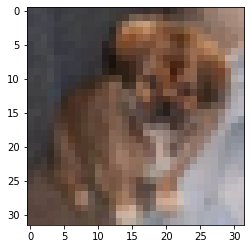

In [7]:
index = np.random.randint(x_train.shape[0])
print('index: ',index)
img, label = x_train[index], y_train[index]
print('class: ',label)
plt.imshow(img)

Preprocess

In [9]:
# normalization 0~1
x_train = x_train/255.
x_val = x_val/255.

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes= num_classes)
y_val = utils.to_categorical(y_val, num_classes= num_classes)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Build model

In [11]:
inputs = layers.Input(shape=(img_size, img_size, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

Training

In [13]:
model.compile(loss= losses.categorical_crossentropy,
       optimizer=optimizers.Adam(),
       metrics=['accuracy'])
# optimize使用SGD時, val_accuracy: 0.5897 , 故使用Adam有moment概念防止停在local minimun做實驗

In [15]:
logs = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(x_val,y_val))

Epoch 1/10
782/782 [==============================] - 274s 350ms/step - loss: 1.3431 - accuracy: 0.5173 - val_loss: 1.0403 - val_accuracy: 0.6340
Epoch 2/10
782/782 [==============================] - 273s 349ms/step - loss: 0.8706 - accuracy: 0.6931 - val_loss: 0.8235 - val_accuracy: 0.7111
Epoch 3/10
782/782 [==============================] - 273s 349ms/step - loss: 0.6691 - accuracy: 0.7663 - val_loss: 0.7776 - val_accuracy: 0.7340
Epoch 4/10
782/782 [==============================] - 272s 348ms/step - loss: 0.5054 - accuracy: 0.8250 - val_loss: 0.7497 - val_accuracy: 0.7567
Epoch 5/10
782/782 [==============================] - 273s 350ms/step - loss: 0.3589 - accuracy: 0.8752 - val_loss: 0.8485 - val_accuracy: 0.7388
Epoch 6/10
782/782 [==============================] - 273s 349ms/step - loss: 0.2296 - accuracy: 0.9199 - val_loss: 0.9066 - val_accuracy: 0.7452
Epoch 7/10
782/782 [==============================] - 272s 348ms/step - loss: 0.1463 - accuracy: 0.9494 - val_loss: 1.0482 -

In [16]:
history = logs.history

Text(0.5, 1.0, 'accuracy')

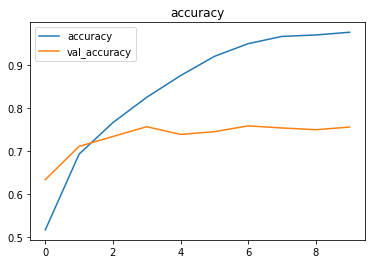

In [17]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

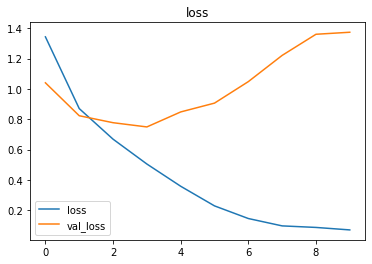

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')

Metrics

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_val, axis=-1)
prediction = model.predict(x_val)
y_pred = np.argmax(prediction,axis=-1)

print(y_true.shape, y_pred.shape)

(10000,) (10000,)


In [20]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.85      0.88      0.86      1000
           2       0.68      0.66      0.67      1000
           3       0.59      0.54      0.56      1000
           4       0.68      0.75      0.71      1000
           5       0.71      0.62      0.66      1000
           6       0.76      0.87      0.81      1000
           7       0.84      0.78      0.81      1000
           8       0.87      0.82      0.85      1000
           9       0.82      0.84      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



In [21]:
# confusion matrix
# row: Ground truth
# column: predict

print(confusion_matrix(y_true, y_pred))

[[805  13  54  20   8   5  20   8  37  30]
 [ 20 879   1   2   2   4   5   2  18  67]
 [ 53   8 662  46  95  30  64  18  15   9]
 [ 27  14  71 536  84 124  85  23  14  22]
 [ 14   4  57  56 746  26  45  37  10   5]
 [ 17   9  45 163  59 618  31  38   6  14]
 [ 10   2  24  37  31  14 871   4   2   5]
 [ 19   6  37  40  58  41   4 779   2  14]
 [ 65  35  19   9   3   7   8   6 824  24]
 [ 30  67   9   7   6   4   8   8  22 839]]


Save model

In [ ]:
# 1. save whole model and weights
model.save('my_model.h5')
model2 = models.load_model('my_model.h5')

In [ ]:
# 2. 

model.save_weights('weigths.h5')

# rebuild model
model = build_model()
model.load_weights('weigths.h5')